# Twitter API

Work with the `tweepy` and `wordcloud` modules to interact with the Twitter API, using `tweepy` and its **Cursor pagination object** to work with the PyBites Twitter account.

`tweepy.Cursor` is an efficient way to loop over tweets.

## Objectives

- Get the most popular Tweets by the number of likes/re-tweets.
- Determine the most common hashtags and mentions.
- Create a wordcloud of the tweets.

In [1]:
# Imports - Python Standard Library
from collections import namedtuple, Counter
from os import getenv
import re

# Imports - Third-Party
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import dotenv
import matplotlib.pyplot as plt
import numpy as np
import tweepy

In [2]:
# Load .env file variables
dotenv.load_dotenv()

True

In [3]:
# namedtuple objects
Tweet = namedtuple(
    typename='Tweet',
    field_names=[
        'id',
        'text',
        'created',
        'likes',
        're_tweets'
    ]
)

In [4]:
# Constants
TWITTER_ACCOUNT = 'pybites'
TWITTER_KEY = getenv('TWITTER_KEY')
TWITTER_SECRET = getenv('TWITTER_SECRET')
TWITTER_ACCESS_TOKEN = getenv('TWITTER_ACCESS_TOKEN')
TWITTER_ACCESS_SECRET = getenv('TWITTER_ACCESS_SECRET')

In [5]:
# Create a tweepy authentication object
auth = tweepy.OAuthHandler(
    consumer_key=TWITTER_KEY,
    consumer_secret=TWITTER_SECRET
)

In [6]:
# Set the access token for the authentication object
auth.set_access_token(
    key=TWITTER_ACCESS_TOKEN,
    secret=TWITTER_ACCESS_SECRET
)

In [7]:
# Authenticate and create an API object
api = tweepy.API(
    auth=auth
)

In [8]:
# Display the API object
print(api)

In [9]:
# Use tweepy.Cursor to get tweets from the Twitter API
tweets = tweepy.Cursor(
    method=api.user_timeline,
    screen_name=TWITTER_ACCOUNT,
    exclude_replies=False,
    include_rts=True
).items()

In [10]:
# Create a generator function to get all tweets
def get_tweets():
    for tweet in tweets:
        yield Tweet(
            id=tweet.id,
            text=tweet.text,
            created=tweet.created_at,
            likes=tweet.favorite_count,
            re_tweets=tweet.retweet_count
        )

In [11]:
# Create a list of tweets from the generator function
tweets = list(get_tweets())

In [12]:
# Display the number of tweets
print(len(tweets))

1959


---

In [13]:
# Exclude retweets from the results
no_retweets = [tweet for tweet in tweets if not tweet.text.startswith('RT')]

In [14]:
# Display the number of non-retweets
print(len(no_retweets))

1225


In [15]:
# Display the first list item, as a result set sample
print(no_retweets[0])

Tweet(id=1481959774422016006, text="We're back with our very first podcast episode this year - enjoy!\n\n#054 - 2022, the year of boundaries!… https://t.co/I637VYLJxD", created=datetime.datetime(2022, 1, 14, 12, 1, 58, tzinfo=datetime.timezone.utc), likes=4, re_tweets=3)


In [16]:
# Sort the list of tweets by the average value of most liked and most retweeted
top_10 = sorted(
    no_retweets,
    key=lambda tweet: (tweet.likes + tweet.re_tweets) / 2,
    reverse=True
)

In [17]:
# Display the first list item, as a result set sample
print(top_10[0])

Tweet(id=1346413728019976192, text='With f-strings you can use &lt;, &gt; and ^ to left / right / center justify strings: https://t.co/bEmOc2ac7V', created=datetime.datetime(2021, 1, 5, 11, 10, 22, tzinfo=datetime.timezone.utc), likes=945, re_tweets=173)


In [18]:
# Get the top 10 tweets
newline = '\n'
for index, tweet in enumerate(top_10[:10], 1):
    print(
        f'{index}. Tweet: 🐦 {tweet.text.replace(newline, " ")}\n'
        f'  Likes: ♥️ {tweet.likes}\n'
        f'  Retweets: ✏️ {tweet.re_tweets}'
    )

1. Tweet: 🐦 With f-strings you can use &lt;, &gt; and ^ to left / right / center justify strings: https://t.co/bEmOc2ac7V
  Likes: ♥️ 945
  Retweets: ✏️ 173
2. Tweet: 🐦 We don't like reinventing the wheel!  The #Python string module has some useful constants you can use in your code: https://t.co/yi5U3K5ny3
  Likes: ♥️ 367
  Retweets: ✏️ 78
3. Tweet: 🐦 You want emojis in #Python? pip install emoji https://t.co/tNeFztOQ0u
  Likes: ♥️ 301
  Retweets: ✏️ 74
4. Tweet: 🐦 #Python is concise and reads like English!  A good example is the any builtin that in this example reduces 4 lines… https://t.co/boYXIiAFQY
  Likes: ♥️ 306
  Retweets: ✏️ 68
5. Tweet: 🐦 #Python #tip: if you want equal width number strings, you can use the zfill() method which adds zeros at the start: https://t.co/AlL88JKwkS
  Likes: ♥️ 311
  Retweets: ✏️ 62
6. Tweet: 🐦 Two ways to get the filename from a file path in #Python: https://t.co/FQhL7Cl9uV
  Likes: ♥️ 311
  Retweets: ✏️ 61
7. Tweet: 🐦 #Python #tip: ever wondered h

---

## Determine the most common hashtags and mentions

In [19]:
# Define a regular expression that captures hashtags
hashtag_re = re.compile(
    pattern=r'''
    \#      # Literal #
    [\w-]    # Any word character (a-z, 0-9, _, -)
    +       # One or more repetitions of the word character
    ''',
    flags=re.VERBOSE
)

In [20]:
# Define a regular expression that captures mentions
mention_re = re.compile(
    pattern=r'''
    @      # Literal @
    [\w-]    # Any word character (a-z, 0-9, _, -)
    +       # One or more repetitions of the word character
    ''',
    flags=re.VERBOSE
)

In [21]:
# Join all tweets together into a single string
all_tweets = ','.join([tweet.text.lower() for tweet in tweets])

In [22]:
# Exclude retweets from tweets, because the mentions can be skewed by having retweets
all_tweets_no_retweets = ','.join([tweet.text.lower() for tweet in tweets if not tweet.text.startswith('RT')])

In [23]:
# Get all hashtags
hashtags = hashtag_re.findall(
    string=all_tweets
)

In [24]:
# Get the top N hashtags
N = 10
top_n_hashtags = Counter(hashtags).most_common(10)

In [25]:
# Function to display the top N hashtags and mentions
from typing import Iterable
def top_n_display(
    type: str,
    iterable: Iterable
) -> None:
    # Setup banner
    count = len(iterable)
    msg = f'** Top {count} {type} **'

    # Display banner
    print(msg)
    print('-' * len(msg))

    # Display results
    for index, item in enumerate(iterable, 1):
        print(f'{index}. {item[0]} ({item[1]})')

    return None

In [26]:
# Display the top N hashtags
top_n_display(
    type='hashtags',
    iterable=top_n_hashtags
)

** Top 10 hashtags **
---------------------
1. #python (680)
2. #100daysofcode (54)
3. #codechallenges (45)
4. #tips (35)
5. #mindset (29)
6. #tip (29)
7. #career (26)
8. #developer (25)
9. #django (19)
10. #productivity (9)


In [27]:
# Find all mentions
mentions = mention_re.findall(
    string=all_tweets_no_retweets
)

In [28]:
# Get the top 10 mentions
N = 10
top_n_mentions = Counter(mentions).most_common(N)

In [29]:
# Display the top N mentions
top_n_display(
    type='mentions',
    iterable=top_n_mentions
)

** Top 10 mentions **
---------------------
1. @talkpython (98)
2. @datwatikmaak (19)
3. @l1dge (19)
4. @bbelderbos (15)
5. @sckhoo (13)
6. @realpython (13)
7. @kellypared (12)
8. @nitin_cherian (11)
9. @tonycapp (10)
10. @rhelmstedter (9)


---

## Create a word cloud using the `wordcloud` module

In [31]:
# Get all tweets, filtering all retweets and mentions
newline = '\n'
txt_tweets_no_rt_no_mentions = ' '.join([tweet.text.lower() for tweet in tweets if not tweet.text.startswith('RT') and not tweet.text.startswith('@')])

In [34]:
# Create an image mask for the word cloud
file_path = './images/pybites.png'

image_mask = np.array(
    object=Image.open(
        fp=file_path
    )
)

In [35]:
# Add stopwords
stopwords = set(STOPWORDS)
stopwords.add('co')
stopwords.add('https')

In [36]:
# Create a word cloud object
word_cloud = WordCloud(
    background_color='white',
    max_words=2000,
    mask=image_mask,
    stopwords=stopwords
)

In [37]:
# Generate the word cloud from the word_cloud object
word_cloud.generate(
    text=txt_tweets_no_rt_no_mentions
)

(-0.5, 2499.5, 2499.5, -0.5)

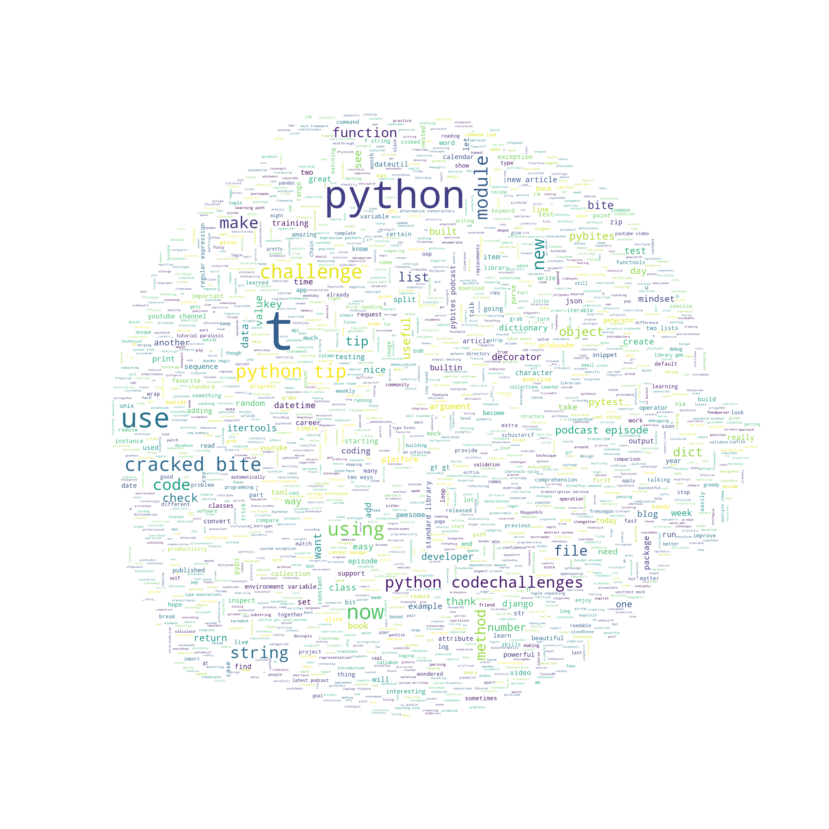

In [38]:
# Display the word cloud
plt.figure(
    figsize=(15, 15)
)

plt.imshow(
    X=word_cloud,
    interpolation='bilinear'
)

plt.margins(
    x=0,
    y=0
)

plt.axis('off')